In [1]:
# Conversion of S6 weather data to the format of PROMICE data

# Version of this script: v05 (focused on S6 2016) (last update: 27/10/2020)
# Author: Nuno Canha

In [2]:
# Information about the weather data:

In [ ]:
# The original database (S6, K-transect) is available in the link below:
# Source: https://www.projects.science.uu.nl/iceclimate/aws/files_oper/oper_01309

In [32]:
# The goal of this script is to convert the original dataset in a dataset with selected parameters (eg., temperature, relative humidity, wind speed and wind direction)
# in order to compare with other databases. This script uses as an example the S6 weather data for the year of 2016.
# The output of this script is a csv file with 1hour averaged values for a specific time period (monitoring period in 2016 for the B&B campaign), along with time-series' Figures of selected parameters.

# To check the working folder:

In [8]:
pwd

'C:\\Users\\Nuno Canha\\Desktop\\Python\\Weather\\Converting other data\\S6 2016'

In [9]:
# Enter in the correct working folder:

In [10]:
cd C:\Users\Nuno Canha\Desktop\Python\Weather\Converting other data\S6 2016

C:\Users\Nuno Canha\Desktop\Python\Weather\Converting other data\S6 2016


In [11]:
# Upload the analysis packages

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
# Basic x-y plot
# this command is for the graphs to appear in the notebook
%matplotlib inline

In [13]:
# Loading the data
name = input('Which weather station is being analised?')

Which weather station is being analised? S6 2016


In [15]:
# Upload of original data (without headings)

In [16]:
# The file name should be changed if needed. It this example, the original input file is called "grl_s6_final_year2017.txt"

In [14]:
data = pd.read_csv("s6_2000_2016_AT_JM.txt", delimiter=",", header=0, na_values=['-9999'])

# No values (-999.0) were replaced by NaN in order to not interfere with the analysis

In [15]:
data

,date,u2,u6,umax2,umax6,dd2,dd6,s_in,s_out,l_in,...,t_snow1,t_snow2,t_snow3,t_snow4,t_snow5,tilt1,tilt2,volt,compass,t_logger
0,2000-01-01 00:00:00,NaN,0.773000,NaN,2.190000,NaN,114.700,-2.647491,-1.925337,249.16859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.49,NaN,-15.060
1,2000-01-01 01:00:00,NaN,1.146000,NaN,2.190000,NaN,160.600,-1.123623,-0.561812,250.44856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.47,NaN,-15.720
2,2000-01-01 02:00:00,NaN,1.668000,NaN,3.086000,NaN,106.400,-1.845777,-0.963280,247.01865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.45,NaN,-16.130
3,2000-01-01 03:00:00,NaN,1.967000,NaN,3.384000,NaN,139.400,-2.647491,-1.283966,239.78972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.42,NaN,-16.780
4,2000-01-01 04:00:00,NaN,2.340000,NaN,3.384000,NaN,136.700,-1.525092,-0.320685,242.12762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.39,NaN,-17.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244296,2016-09-13 15:00:00,5.298980,6.027551,5.702041,6.473469,139.825,134.515,499.257060,415.601780,221.91311,...,-0.570,-1.502,-0.195,-0.176,0.118,7.7,-11.3,14.04,335.6,5.012
244297,2016-09-13 15:30:00,4.548980,5.235714,5.022449,5.798980,142.325,136.625,484.398220,385.884100,221.99494,...,-0.508,-1.282,0.279,-0.086,0.121,8.0,-11.0,14.06,330.5,7.300
244298,2016-09-13 16:00:00,4.157143,4.831633,5.030612,5.645918,145.425,139.025,426.745910,327.043090,229.29096,...,-0.472,-1.107,0.315,-0.045,0.114,8.0,-11.1,14.07,333.8,8.460
244299,2016-09-13 16:30:00,3.710204,4.391837,4.195918,4.792857,141.625,138.675,395.393760,295.393760,234.78332,...,-0.430,-0.958,0.228,-0.041,0.113,8.1,-10.8,14.09,332.2,8.330


In [16]:
# NOT necessary in this case!
# Upload the headers for the dataframe
# NOT necessary now!
#cols = ['year','month','days','hours','minutes','doy','TC1avg','TC1std','TC2avg','TC2std','CJavg','xTSTR1','xTSTR2','xTSTR3','xTSTR4','xTSTR5','xTSTR6','xTSTR7','xTSTR8','THUTavg','RHWavg','RHTavg','HWSavg','HWSstd','HWSmax','HWDavg','VWSavg','VWSstd','NRUavg','NRUstd','NRLavg','NRIUavg','NRILavg','NRTavg','NRUcal','NRLcal','NRIUcal','NRILcal','NRID','BAP','SSH','xADW','xTBRG','MCH','TILTX','TILTY','LON','LAT','HMSL','PACC','SATS','spare','spare','VBAT','LBUT','STATUS','iwsID','xID','xTC1avg','xTC2avg','xCJavg','xTHUTavg','xRHWavg','xRHTavg','xHWSavg','xHWDavg','xVWSavg','xSSH','xSPARE1','xVBAT','xSTATUS','Thutcorr','Rhnew','Lin','Lout','dL']


In [17]:
# Select only 2016 year:
data1=data[(data['date'] >= '2016-01-01 00:00:00') & (data['date'] < '2017-01-01 00:00:00') ]
data1['date'] = data1['date'].astype('datetime64')
data1 = data1.set_index('date')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
data1

,u2,u6,umax2,umax6,dd2,dd6,s_in,s_out,l_in,l_out,...,t_snow1,t_snow2,t_snow3,t_snow4,t_snow5,tilt1,tilt2,volt,compass,t_logger
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,4.392857,5.301020,5.354082,6.360204,111.625,112.737,-1.580981,0.592868,181.29685,175.36669,...,-19.750,-17.180,-16.440,-16.160,-15.290,-2.2,-5.5,12.80,329.8,-35.950
2016-01-01 00:30:00,4.493878,5.415306,5.741837,6.870408,122.525,116.224,-1.383358,0.395245,182.39955,175.67890,...,-19.790,-17.200,-16.450,-16.180,-15.290,-2.4,-5.5,12.79,332.9,-36.000
2016-01-01 01:00:00,4.621429,5.579592,5.702041,6.786735,122.025,117.383,-1.778603,0.197623,181.34105,174.81802,...,-19.830,-17.220,-16.460,-16.180,-15.290,-2.4,-5.8,12.78,328.2,-36.100
2016-01-01 01:30:00,3.851020,4.726531,4.117347,5.075510,112.925,112.381,-1.976226,0.197623,180.25292,173.33464,...,-19.880,-17.230,-16.480,-16.190,-15.300,-2.4,-5.7,12.77,336.0,-36.260
2016-01-01 02:00:00,3.877551,4.750000,4.801020,5.814286,110.925,108.925,-1.383358,0.592868,178.92803,172.20738,...,-19.930,-17.250,-16.480,-16.210,-15.300,-1.9,-5.5,12.76,329.9,-36.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-13 15:00:00,5.298980,6.027551,5.702041,6.473469,139.825,134.515,499.257060,415.601780,221.91311,299.08993,...,-0.570,-1.502,-0.195,-0.176,0.118,7.7,-11.3,14.04,335.6,5.012
2016-09-13 15:30:00,4.548980,5.235714,5.022449,5.798980,142.325,136.625,484.398220,385.884100,221.99494,303.22823,...,-0.508,-1.282,0.279,-0.086,0.121,8.0,-11.0,14.06,330.5,7.300
2016-09-13 16:00:00,4.157143,4.831633,5.030612,5.645918,145.425,139.025,426.745910,327.043090,229.29096,305.45738,...,-0.472,-1.107,0.315,-0.045,0.114,8.0,-11.1,14.07,333.8,8.460


In [ ]:
# Plot plots for selected parameters:

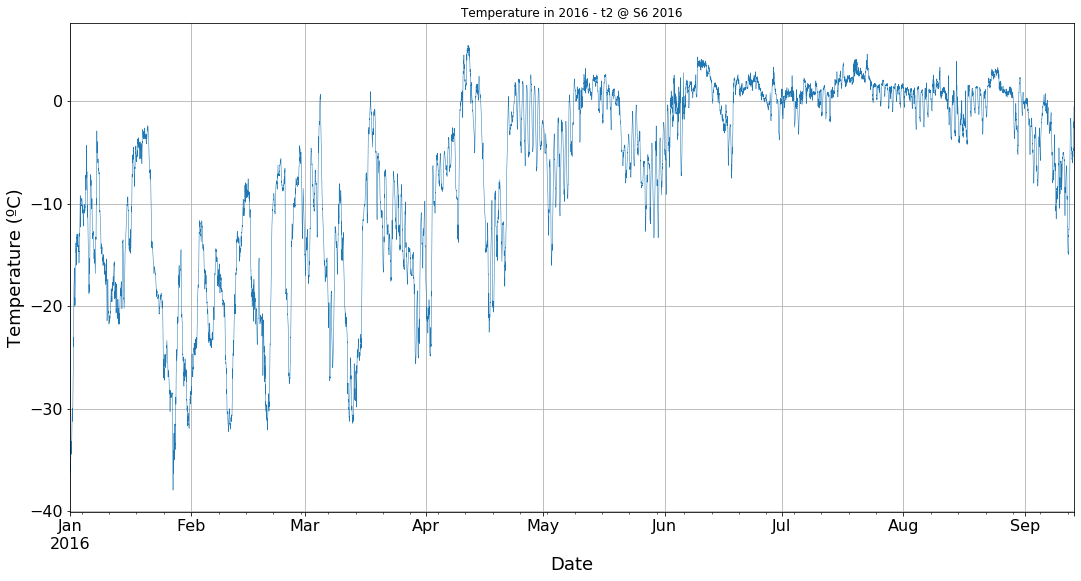

In [20]:
# Plot of the time series of Temp data (parameter: t2):

fig1 = data1['t2'].plot(linewidth=0.5, title ='Temperature in 2016 - t2 @ '+ name,fontsize=20);
fig1.set_xlabel('Date', fontsize=18)
fig1.set_ylabel('Temperature (ºC)',fontsize=18)
fig1.grid(True)
fig1.tick_params(axis='x', labelsize=16 )
fig1.tick_params(axis='y', labelsize=16 )

# To save the figure
plt.savefig('Fig1a - Temperature over 2016 - t2 @ '+ name)

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

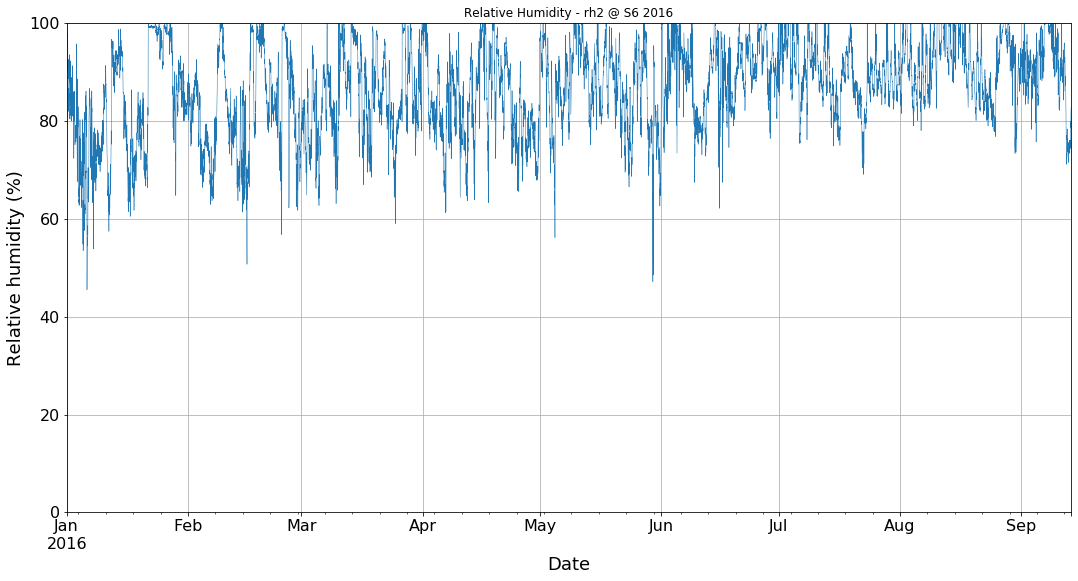

In [21]:
# Plot of the time series of Relative Humidity data (parameter: rh2):

fig1 = data1['rh2'].plot(linewidth=0.5, title ='Relative Humidity - rh2 @ '+ name);
fig1.set_xlabel('Date',fontsize=18)
fig1.set_ylabel('Relative humidity (%)',fontsize=18)
fig1.tick_params(axis='x', labelsize=16 )
fig1.tick_params(axis='y', labelsize=16 )

fig1.grid(True)
# Limits for y-axis are the minimum and maximum values of Fluxes
fig1.set_ylim(0,100)
# To save the figure
plt.savefig('Fig2 -Relative Humidity - rh2 @ '+ name)

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

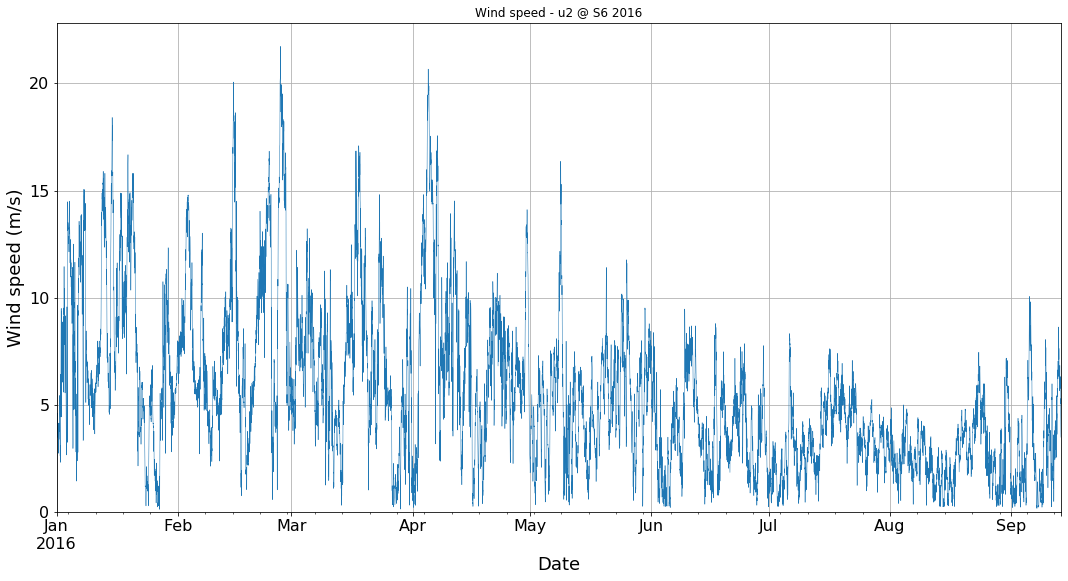

In [22]:
# Plot of the time series of Wind speed data (parameter: u2):

fig1 = data1['u2'].plot(linewidth=0.5, title ='Wind speed - u2 @ '+ name);
fig1.set_xlabel('Date', fontsize=18)
fig1.set_ylabel('Wind speed (m/s)', fontsize=18)
fig1.tick_params(axis='x', labelsize=16 )
fig1.tick_params(axis='y', labelsize=16 )
fig1.grid(True)

# Limits for y-axis are the minimum and maximum values of Fluxes
fig1.set_ylim(0,)

# To save the figure
plt.savefig('Fig3 - Wind speed - u2 @  '+ name)

# Bigger figure
plt.rcParams['figure.figsize'] = [9, 4.5]

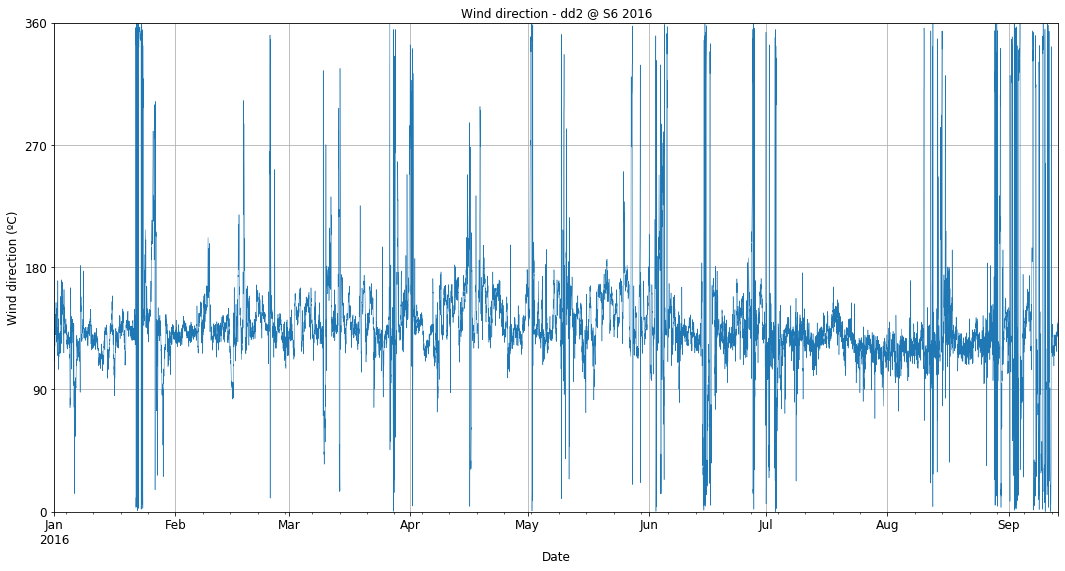

In [31]:
# Plot of the time series of Wind direction data (parameter: dd2):

fig1 = data1['dd2'].plot(linewidth=0.5, title ='Wind direction - dd2 @ '+ name);
fig1.set_xlabel('Date',fontsize=12)
fig1.set_ylabel('Wind direction (ºC)',fontsize=12)
fig1.tick_params(axis='x', labelsize=12 )
fig1.tick_params(axis='y', labelsize=12 )
fig1.set_ylim(0,360)
plt.yticks(np.arange(0,361,90))
fig1.grid(True)

# Limits for y-axis are the minimum and maximum values of Fluxes
fig1.set_ylim(0,360)

# To save the figure
plt.savefig('Fig4 - Wind direction - dd2 @  '+ name)

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

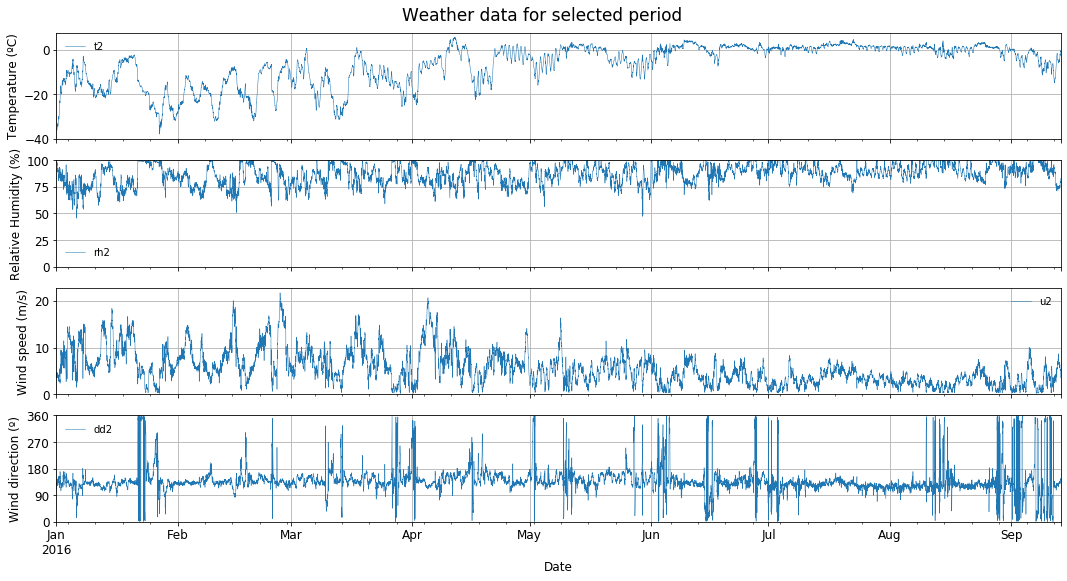

In [33]:
# Creating an integrated plot with all weather parameters:

import matplotlib.ticker as mtick

fig5,(ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig5.suptitle('Weather data for selected period', y=0.92,fontsize=17)

# To define the data for the plots (and which type):
data1['t2'].plot(linewidth=0.5, ax=ax1);
data1['rh2'].plot(linewidth=0.5, ax=ax2)
data1['u2'].plot(linewidth=0.5, ax=ax3)
data1['dd2'].plot(linewidth=0.5, ax=ax4)

# Set up the 1st plot (ax1):
ax1.set_xlabel('Date',fontsize=12)
ax1.set_ylabel('Temperature (ºC)',fontsize=12)
ax1.grid(True)
ax1.legend(frameon=False, ncol=3)
ax1.tick_params(axis='x', labelsize=12 )
ax1.tick_params(axis='y', labelsize=12 )

# Set up the 2nd plot (ax2):
ax2.set_xlabel('Date',fontsize=12)
ax2.set_ylabel('Relative Humidity (%)',fontsize=12)
ax2.set_ylim(0,100)
ax2.grid(True)
ax2.legend(frameon=False, ncol=3)
ax2.tick_params(axis='x', labelsize=12 )
ax2.tick_params(axis='y', labelsize=12 )

# Set up the 3rd plot (ax3):
ax3.set_xlabel('Date',fontsize=12)
ax3.set_ylabel('Wind speed (m/s)',fontsize=12)
ax3.set_ylim(0,)
ax3.grid(True)
ax3.legend(frameon=False, ncol=3)
ax3.tick_params(axis='x', labelsize=12 )
ax3.tick_params(axis='y', labelsize=12 )

# Set up the 4th plot (ax4):
ax4.set_xlabel('Date',fontsize=12)
ax4.set_ylabel('Wind direction (º)',fontsize=12)
ax4.set_ylim(0,360)
plt.yticks(np.arange(0,361,90))
ax4.grid(True)
ax4.legend(frameon=False, ncol=3)
ax4.tick_params(axis='x', labelsize=12 )
ax4.tick_params(axis='y', labelsize=12 )

# To save the figure
plt.savefig('Fig5 - Weather data for selected period')

In [34]:
# Select the period of B&B campaign:

data2=data1[(data1.index >= '2016-07-10 00:00:00')]
data3=data2[(data2.index < '2016-08-21 00:00:00')]

data3


,u2,u6,umax2,umax6,dd2,dd6,s_in,s_out,l_in,l_out,...,t_snow1,t_snow2,t_snow3,t_snow4,t_snow5,tilt1,tilt2,volt,compass,t_logger
date,,,,,,,,,,,,,,,,,,,,,
2016-07-10 00:00:00,2.875510,3.663265,3.362245,3.967347,133.425,131.095,161.961370,63.774146,233.69269,311.83533,...,-0.035,0.392,-0.165,0.171,0.123,-3.1,-4.1,14.17,323.5,6.143
2016-07-10 00:30:00,2.780612,3.583674,3.169388,3.925510,137.625,136.225,121.991080,45.869242,233.81821,310.19266,...,-0.066,0.275,-0.335,0.044,0.092,-3.1,-4.1,14.17,323.5,5.555
2016-07-10 01:00:00,2.782653,3.580612,3.216327,4.038775,127.525,128.305,80.118871,29.138187,232.89015,310.66133,...,-0.084,0.060,-0.565,-0.031,0.074,-3.3,-4.2,14.16,324.3,4.738
2016-07-10 01:30:00,2.921429,3.743878,3.314286,4.201020,137.625,140.865,43.313522,16.731055,233.59009,311.35829,...,-0.109,0.007,-0.575,-0.056,0.059,-3.1,-4.2,14.16,324.0,3.364
2016-07-10 02:00:00,3.098980,3.859184,3.859184,4.530612,136.425,131.595,10.832095,7.283804,236.98176,312.18978,...,-0.105,-0.023,-0.643,-0.071,0.054,-3.3,-4.4,14.15,323.7,2.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20 21:30:00,2.210204,3.097959,2.414286,3.308163,128.925,120.655,227.043090,76.151560,240.97720,316.54926,...,-0.050,2.117,1.050,0.737,0.199,5.2,-9.5,14.22,330.7,9.110
2016-08-20 22:00:00,2.165306,3.067347,2.674490,3.490816,128.925,116.019,141.753340,52.942051,250.71564,313.69484,...,-0.017,2.207,0.501,0.434,0.189,5.2,-9.6,14.21,331.9,6.348
2016-08-20 22:30:00,2.492857,3.343878,2.821429,3.690816,126.125,118.905,192.124810,61.411590,248.03325,311.22195,...,-0.072,0.764,0.294,0.082,0.159,5.1,-9.6,14.20,331.4,4.946


In [35]:
# Create a new dataset ("data4") with a timestamp and the selected parameters

data4 = data3[['t2']].join(data3[['rh2']].join(data3[['u2']].join(data3[['dd2']])))
data4

,t2,rh2,u2,dd2
date,,,,
2016-07-10 00:00:00,0.849503,91.684564,2.875510,133.425
2016-07-10 00:30:00,0.945503,91.265038,2.780612,137.625
2016-07-10 01:00:00,0.742982,92.360298,2.782653,127.525
2016-07-10 01:30:00,0.698557,92.428070,2.921429,137.625
2016-07-10 02:00:00,0.656646,93.659880,3.098980,136.425
...,...,...,...,...
2016-08-20 21:30:00,0.482624,93.849159,2.210204,128.925
2016-08-20 22:00:00,0.273560,92.373272,2.165306,128.925
2016-08-20 22:30:00,0.372602,92.221054,2.492857,126.125


In [36]:
# Change the columns headers:
new_names={'t2':'T - S6','rh2':'RH - S6','u2':'WS - S6', 'dd2': 'WD - S6'}
data4 = data4.rename(columns=new_names)
data4.head()

,T - S6,RH - S6,WS - S6,WD - S6
date,,,,
2016-07-10 00:00:00,0.849503,91.684564,2.875510,133.425
2016-07-10 00:30:00,0.945503,91.265038,2.780612,137.625
2016-07-10 01:00:00,0.742982,92.360298,2.782653,127.525
2016-07-10 01:30:00,0.698557,92.428070,2.921429,137.625
2016-07-10 02:00:00,0.656646,93.659880,3.098980,136.425


In [37]:
data4.dtypes

T - S6     float64
RH - S6    float64
WS - S6    float64
WD - S6    float64
dtype: object

In [39]:
# Resample to hourly data:

Hourly = data4[['T - S6','RH - S6','WS - S6','WD - S6']].resample('H').agg(['mean'])

# Remark: Wind direction was also averaged!

Hourly

,T - S6,RH - S6,WS - S6,WD - S6
,mean,mean,mean,mean
date,,,,
2016-07-10 00:00:00,0.897503,91.474801,2.828061,135.525
2016-07-10 01:00:00,0.720770,92.394184,2.852041,132.575
2016-07-10 02:00:00,0.537424,94.207988,3.355102,136.025
2016-07-10 03:00:00,0.237454,95.321349,3.246429,134.075
2016-07-10 04:00:00,-0.466191,95.506535,2.579592,130.425
...,...,...,...,...
2016-08-20 19:00:00,0.619788,100.339516,1.902041,119.975
2016-08-20 20:00:00,0.744053,95.802870,2.015816,109.925


In [40]:
# How to save the file with hourly values for the specific time period:

selection = Hourly

output_selection = 'S6_2016_Hourly.csv'

# Save dataframe to csv
selection.to_csv(output_selection, sep=',', index = True)